In [3]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


## 선형모델
### Wave 데이터셋
* 파라미터 학습

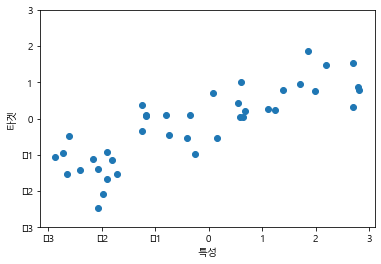

w[0]: 0.393906  b: -0.031804


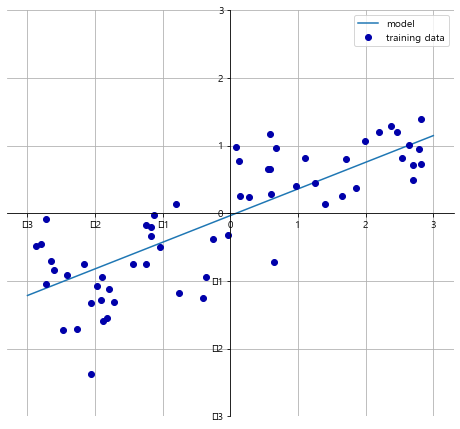

In [4]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')
plt.show()
# 만약 특성이 1개인 데이터 셋이면 y=w[0]*x[0]+b 
# 특성이 많아지면 w는 각 특성에 해당하는 기울기를 가짐
mglearn.plots.plot_linear_regression_wave()

# Linear Regression(선형 회귀) 모델 - 보스턴 주택가격(복잡한 데이터 셋)

In [5]:
from sklearn.datasets import load_boston
import mglearn
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston() # load_extended 기존 특성보다 늘림
print("X.shape : {}".format(X.shape))

# X.shape: (506, 104)
# 506개의 샘플과 104개의 특성

X.shape : (506, 104)


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 선형 회귀 모델로 성능 확인

In [12]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체 생성
lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터 (w)는 가중치/계수라고 하며 coef_속성에 저장되어있다.
# 파라미터b는 편향/절편 값은 intercept_ 속성에 저장되어있다.
print("lr.coef_:{}".format(lr.coef_)) # 속성값 출력시 _ 붙음
print("lr.intercept_:{}".format(lr.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_:[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01

### 훈련 데이터와 테스트 데이터 사이에 성능 차이가 크다. 과대적합

### 릿지 회귀

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트의 정확도 : 0.89
테스트 세트의 정확도 : 0.75


### LinearRegression에 비해 훈련 세트에서는 점수가 낮지만 테스트 세트에 대한 점수는 더 높다

### 선형 회귀는 이 데이터 셋에서 과대적합되지만 Ridge는 덜 자유로운 모델이기에 과대적합이 적어진다.

### 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다.

### 우리가 관심있는것은 훈련 세트가 아닌 테스트 세트이므로 Ridge 모델을 선택해야한다.

### Ridge는 모델을 단순하게 해주고 훈련 세트에 대한성능
### alpha 매개변수 값을 바꿔서 확인

### 4. alpha값에 따른일반화 확인

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트의 정확도 : 0.89
테스트 세트의 정확도 : 0.75


In [15]:
# alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나
# 단순화 할지 지정할 수 있다.(기본값 alhpa = 1.)
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬어짐

ridge10= Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트의 정확도 : 0.79
테스트 세트의 정확도 : 0.64


In [16]:
# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서
# LinearRegression으로 만든 모델과 거의 같아짐

ridge01= Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트의 정확도 : 0.93
테스트 세트의 정확도 : 0.77


### 5.alpha 값에 따른 coef_) 속성의 변화 확인하기
* alpha값에 따른 coef_속성(w)의 변화를 그래프로 확인

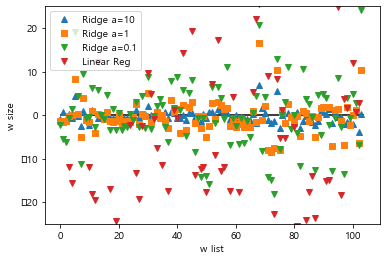

In [17]:
plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'v',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()


### 위 그림은 선형회귀/Ridge 회구의 alpha값에 따른 그래프를 확인

### alpha값이 커질수록 0(파란색 선)에 가까워짐을 알 수 있다. -> score는 낮아지지만 일반화 되어감

### 6. 데이터 셋의 크기에 따른 모델의 성능 변화 확인하기
### 학습 곡선: 데이터셋의 샘플링에 따른 모델의 성능변화 그래프

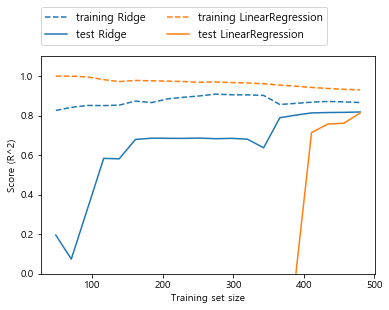

In [19]:
mglearn.plots.plot_ridge_n_samples()

## 위 극림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다.

* 릿지 회귀에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회구의 훈련 데이터 점수보다 낮다.
* 그러나 테스트 데이터에서는 릿지의 점수가 더 높으며 특별히 작은 데이터 셋에서는 더 그렇다.
* 두 모델의 성능은 데이터가 많아질수록 좁아지고 마지막에는 성형회귀가 릿지 회귀를 따라잡는다.
* => 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.